<a href="https://colab.research.google.com/github/Venckus/lt-sectors-analysis/blob/master/lt_economy_sectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of Lithuanian business income and profitability (by IVRK sectors)

##*Goals*


1. find business sectors having biggest sales by nominal values (euros).
2. find business sectors having smallest cyclical influences.
3. find business sectors having highest profitability ratio.

## Data Set 
Data is taken from government department of statistics.

Quarterly data  2007 q1 to 2020 q1.
Data sets: 
* 'Įmonių pajamos, sąnaudos, pelnas'
- pardavimo pajamos,
- pardavimo savikaina,
- bendras pelnas nuostolis,
- veiklos sanaudos,
- pardavimo sanaudos,
- bendros ir administracines sanaudos,
- kitos veiklos rezultatai,
- ukines veiklos pelnas / nuostolis,
- finansines ir investicines veiklos pelnas / nuostolis,
- pelnas / nuostolis pries apmokestinima

Load and mount google drive and other packages.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pip install nb_black

In [6]:
import IPython

In [ ]:
%load_ext lab_black

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
print("Setup Complete")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setup Complete


Set root path

In [9]:
!ls 'drive/My Drive/Colab Notebooks/AIacademy/class-D/project/'

data-table-10y.csv  imoniu-pajamos-sanaudos-pelnas-kableliai-full.csv
git.ipynb	    lt-economy-sectors.ipynb


In [10]:
project_path = 'drive/My Drive/Colab Notebooks/AIacademy/class-D/project/'

##Data cleaning

Check file content

In [11]:
df = pd.read_csv(project_path + 'data-table-10y.csv')
df.head(3)

,Laikotarpis,Rodiklis,"Pajamų, sąnaudų, pelno sudedamosios dalys","Ekonominės veiklos rūšis (EVRK 2 red., 2 ženklų lygiu)",Matavimo vienetai,Reikšmė
0,2007K1,"Įmonių pajamos, sąnaudos, pelnas",Pardavimo pajamos,Miškininkystė ir žuvininkystė,tūkst. EUR,68087.0
1,2007K2,"Įmonių pajamos, sąnaudos, pelnas",Pardavimo pajamos,Miškininkystė ir žuvininkystė,tūkst. EUR,71223.0
2,2007K3,"Įmonių pajamos, sąnaudos, pelnas",Pardavimo pajamos,Miškininkystė ir žuvininkystė,tūkst. EUR,67552.0


In [12]:
df.columns

Index(['Laikotarpis', 'Rodiklis', 'Pajamų, sąnaudų, pelno sudedamosios dalys',
       'Ekonominės veiklos rūšis (EVRK 2 red., 2 ženklų lygiu)',
       'Matavimo vienetai', 'Reikšmė'],
      dtype='object')

Getting rid of unnecesary columns `matavimo vienetai` and `Rodiklis`.

In [13]:
del(df['Matavimo vienetai'], df['Rodiklis'])

In [14]:
df.head(3)

,Laikotarpis,"Pajamų, sąnaudų, pelno sudedamosios dalys","Ekonominės veiklos rūšis (EVRK 2 red., 2 ženklų lygiu)",Reikšmė
0,2007K1,Pardavimo pajamos,Miškininkystė ir žuvininkystė,68087.0
1,2007K2,Pardavimo pajamos,Miškininkystė ir žuvininkystė,71223.0
2,2007K3,Pardavimo pajamos,Miškininkystė ir žuvininkystė,67552.0


Renaming columns.

In [15]:
df.columns = ['quarters', 'financial_elements', 'sectors', 'money']
df.head(3)

,quarters,financial_elements,sectors,money
0,2007K1,Pardavimo pajamos,Miškininkystė ir žuvininkystė,68087.0
1,2007K2,Pardavimo pajamos,Miškininkystė ir žuvininkystė,71223.0
2,2007K3,Pardavimo pajamos,Miškininkystė ir žuvininkystė,67552.0


What unique different financial elements are in dataset?

In [16]:
df['financial_elements'].unique()

array(['Pardavimo pajamos', 'Bendrasis pelnas, nuostolis (-)',
       'Bendrosios ir administracinės sąnaudos', 'Kitos veiklos pajamos',
       'Kitos veiklos sąnaudos',
       'Pelnas,  nuostolis (-) prieš apmokestinimą'], dtype=object)

We will work with `Pardavimo pajamos` and `Pelnas,  nuostolis (-) prieš apmokestinimą`

In [17]:
df['sectors'].unique()

array(['Miškininkystė ir žuvininkystė', 'Žvejyba ir akvakultūra',
       'Kasyba ir karjerų eksploatavimas', 'Apdirbamoji gamyba',
       'Elektros, dujų, garo tiekimas ir oro kondicionavimas',
       'Vandens tiekimas, nuotekų valymas, atliekų tvarkymas ir regeneravimas',
       'Statyba',
       'Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas',
       'Transportas ir saugojimas',
       'Apgyvendinimo ir maitinimo paslaugų veikla',
       'Informacija ir ryšiai', 'Nekilnojamojo turto operacijos',
       'Profesinė, mokslinė ir techninė veikla',
       'Administracinė ir aptarnavimo veikla', 'Švietimas',
       'Žmonių sveikatos priežiūra ir socialinis darbas',
       'Meninė, pramoginė ir poilsio organizavimo veikla',
       'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas; kita asmenų aptarnavimo veikla',
       'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas',
       'Kita asmenų aptarnavimo veikla'], dtype=object)

Removing dublicated sectors:

'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas; kita asmenų aptarnavimo veikla',

'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas'





In [18]:
df = df[df.sectors != 'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas; kita asmenų aptarnavimo veikla']

In [19]:
df['sectors'].unique()

array(['Miškininkystė ir žuvininkystė', 'Žvejyba ir akvakultūra',
       'Kasyba ir karjerų eksploatavimas', 'Apdirbamoji gamyba',
       'Elektros, dujų, garo tiekimas ir oro kondicionavimas',
       'Vandens tiekimas, nuotekų valymas, atliekų tvarkymas ir regeneravimas',
       'Statyba',
       'Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas',
       'Transportas ir saugojimas',
       'Apgyvendinimo ir maitinimo paslaugų veikla',
       'Informacija ir ryšiai', 'Nekilnojamojo turto operacijos',
       'Profesinė, mokslinė ir techninė veikla',
       'Administracinė ir aptarnavimo veikla', 'Švietimas',
       'Žmonių sveikatos priežiūra ir socialinis darbas',
       'Meninė, pramoginė ir poilsio organizavimo veikla',
       'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas',
       'Kita asmenų aptarnavimo veikla'], dtype=object)

# Sales income analysis

In [20]:
sales_income = df[df['financial_elements'] == 'Pardavimo pajamos']
del sales_income['financial_elements']

In [21]:
sales_income.head(3)

,quarters,sectors,money
0,2007K1,Miškininkystė ir žuvininkystė,68087.0
1,2007K2,Miškininkystė ir žuvininkystė,71223.0
2,2007K3,Miškininkystė ir žuvininkystė,67552.0


## Sectors exploration

In [22]:
sectors = sales_income['sectors'].unique()
for sector in sectors:
  print(sector)
len(sectors)

Miškininkystė ir žuvininkystė
Žvejyba ir akvakultūra
Kasyba ir karjerų eksploatavimas
Apdirbamoji gamyba
Elektros, dujų, garo tiekimas ir oro kondicionavimas
Vandens tiekimas, nuotekų valymas, atliekų tvarkymas ir regeneravimas
Statyba
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas
Transportas ir saugojimas
Apgyvendinimo ir maitinimo paslaugų veikla
Informacija ir ryšiai
Nekilnojamojo turto operacijos
Profesinė, mokslinė ir techninė veikla
Administracinė ir aptarnavimo veikla
Švietimas
Žmonių sveikatos priežiūra ir socialinis darbas
Meninė, pramoginė ir poilsio organizavimo veikla
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas
Kita asmenų aptarnavimo veikla


19

In [23]:
sales_income[sales_income['sectors'] == sectors[0]].head(3)

,quarters,sectors,money
0,2007K1,Miškininkystė ir žuvininkystė,68087.0
1,2007K2,Miškininkystė ir žuvininkystė,71223.0
2,2007K3,Miškininkystė ir žuvininkystė,67552.0


In [24]:
sales_income[sales_income['sectors'] == sectors[0]].describe()

,money
count,53.000000
mean,92765.037736
std,27122.402201
min,51611.000000
25%,70536.000000
50%,85900.000000
75%,117035.000000
max,147319.000000


### Histogram distribution of one sector

Text(0.5, 1.0, 'Distribution of sector sales income money')

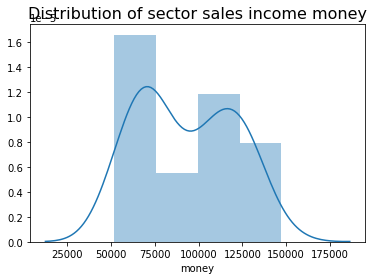

In [30]:
sns.distplot(a=sales_income[sales_income['sectors'] == sectors[0]]['money'], label=sectors[0])
plt.title('Distribution of sector sales income money', fontdict={'fontsize': 16})

##Sales exploration

###Compare all sectors absolute values of money

Using Y axis `log` scale, because of big differences in values between sectors.

Text(0.5, 1.0, 'Distributions of sectors sales income money')

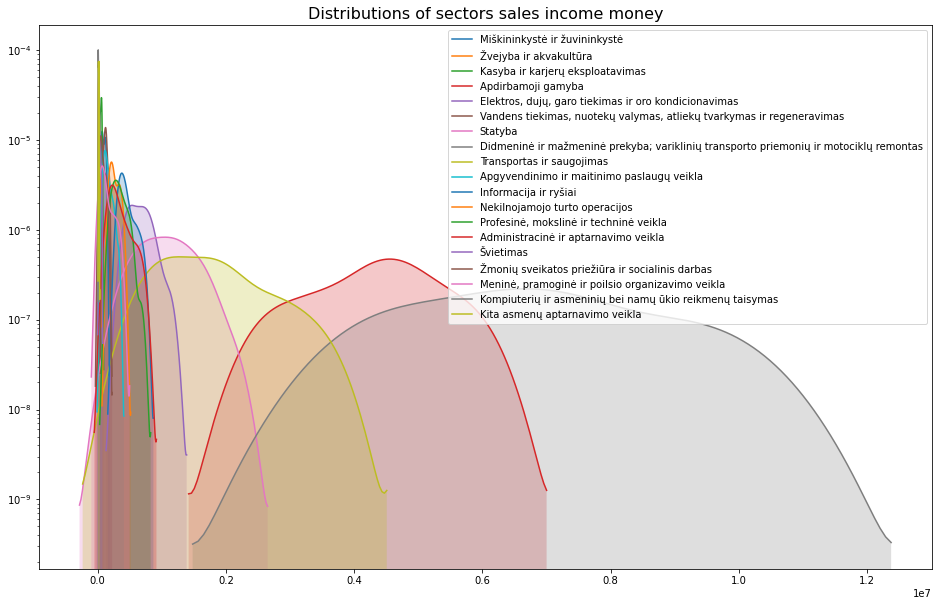

In [29]:
plt.subplots(figsize=(16, 10))
for sector in sectors:
  sns.kdeplot(data=sales_income[sales_income['sectors'] == sector]['money'], label=sector, shade=True)
plt.yscale('log')
plt.title('Distributions of sectors sales income money', fontdict={'fontsize': 16})

In [27]:
sales_income_list = [sales_income[sales_income['sectors'] == sector]['money'] for sector in sectors]

### Histogram of distribution of sectors sales

In [28]:
fig = ff.create_distplot(sales_income_list, sectors, curve_type='kde', show_hist=False)
fig.update_layout(
    xaxis_type="log",
    yaxis_type="log",
    margin=dict(l=5, r=5, b=5, t=40, pad=5),
    showlegend=False,
    title='Each sector distribution of sales income in EUR'
)
fig.show()

Histogram where X axis is money, Y axis is rate. Interactive figure with `log` scale on both axis reveal differences in sales of different sectors.

## Sectors sizes

### Exploring sectors size differences using scatterplots

Text(0.5, 1.0, 'Scatterplot of sectors sales income money')

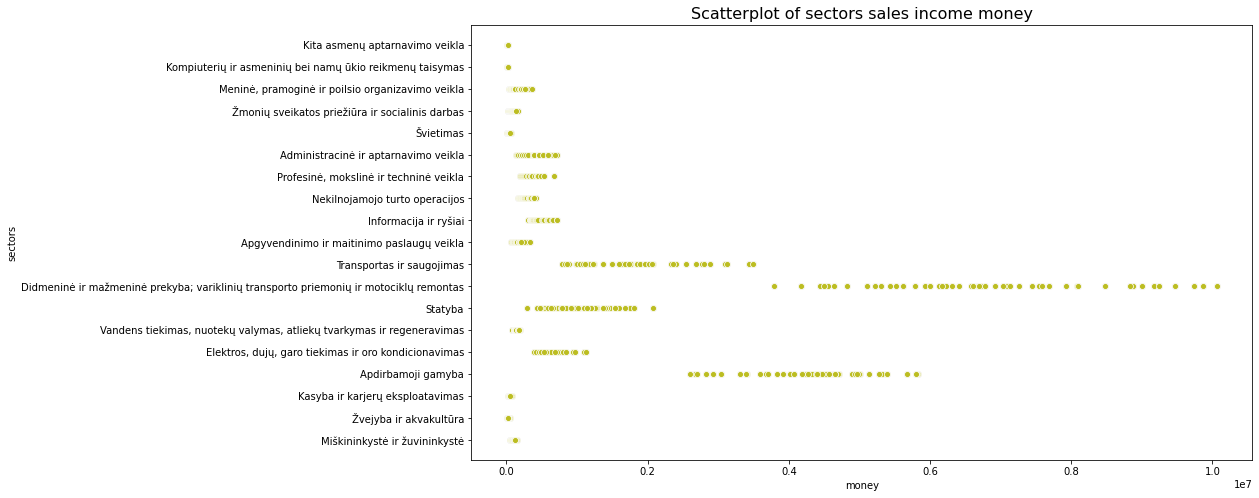

In [31]:
plt.subplots(figsize=(14, 8))
for sector in sectors:
  sns.scatterplot(x='money', y='sectors', data=sales_income)
plt.title('Scatterplot of sectors sales income money', fontdict={'fontsize': 16})

There is a clue of 2 - 3 sectors standing out.

### Exploring sectors size differences using swarmplots

Text(0.5, 1.0, 'Swarmplot of sectors sales income money')

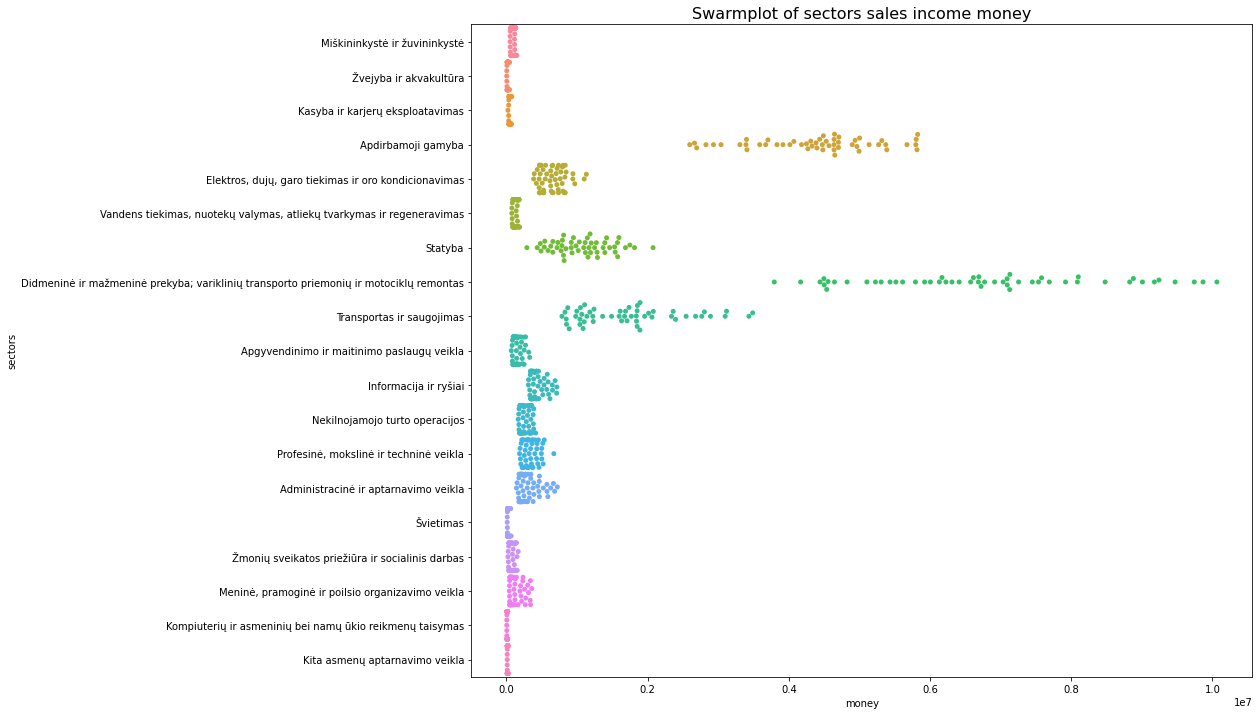

In [32]:
plt.subplots(figsize=(14, 12))
sns.swarmplot(x=sales_income['money'], y=sales_income['sectors'])
plt.title('Swarmplot of sectors sales income money', fontdict={'fontsize': 16})

This graph reveal five standing out sectors and two of them distinctly. One sector is biggest and the second in nearly half of biggest.

## Sectors by sales mean value

In [33]:
sectors_sales_mean = (sales_income.groupby('sectors')
                                  .money.agg([np.mean])
                                  .round(2)
                                  .sort_values(by=['mean'],  ascending=False)
)

Text(0.5, 1.0, 'Each sector mean of all quarters, sorted by size')

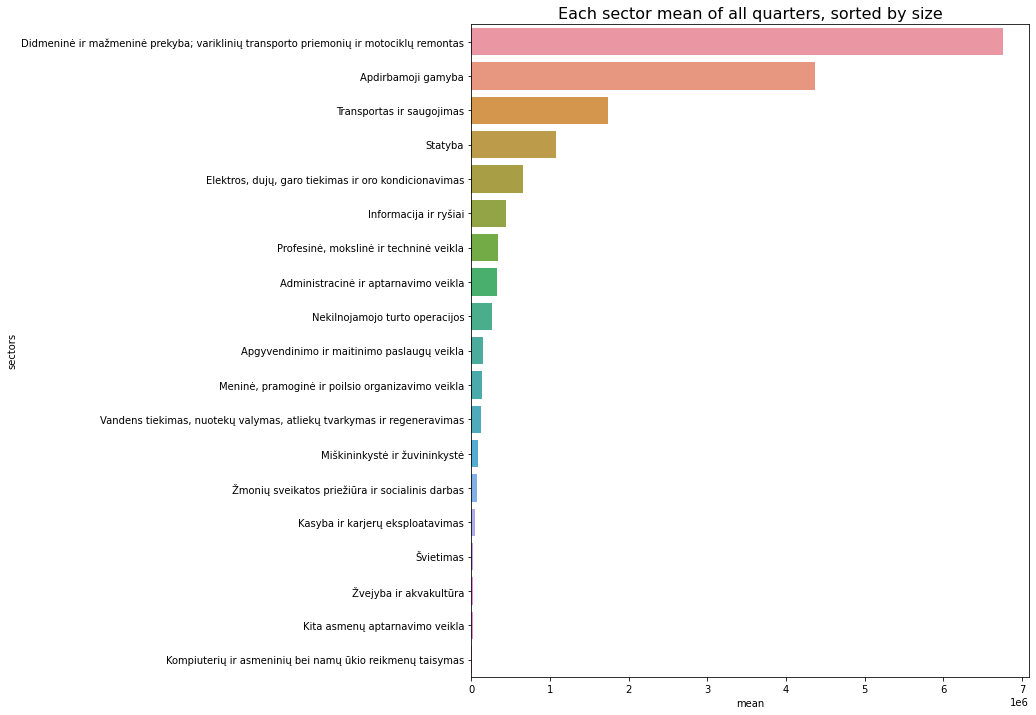

In [34]:
plt.subplots(figsize=(10, 12))
sns.barplot(x="mean", y=sectors_sales_mean.index, data=sectors_sales_mean)
plt.title('Each sector mean of all quarters, sorted by size', fontdict={'fontsize': 16})

## Each sector quarterly nominal (eur) change

In [35]:
fig = px.line(sales_income, x="quarters", y="money", color='sectors',
              title='Each sector quarters sales income change in EUR from previous quarter')
fig.update_layout(
    margin=dict(l=5, r=5, b=5, t=40, pad=5),
    showlegend=False,
    yaxis_type="log"
)
fig.show()

In figure above few sectors reveal very small to nearly no growth. Growth of  healthcare sector is slow but very steady and stable while other sectors experience much higher fluctuations quarter by quarter.

## Each sector quarterly percentage change from previous quarter

In [36]:
sales_income['change_percent'] = (sales_income.money.pct_change() * 100).round(2)
# sales_income.head()

Fix missing and anomaly values when sector changes

In [37]:
sales_income.change_percent = np.where(sales_income.quarters == '2007K1', 0, sales_income.change_percent)
# sales_income.loc[sales_income['quarters'] == '2007K1']

In [38]:
fig = px.line(sales_income, x="quarters", y="change_percent", color='sectors',
              title='Each sector quarters change of sales income in % from previous quarter')
fig.update_layout(
    margin=dict(l=5, r=5, b=5, t=50, pad=5),
    showlegend=False
)
fig.show()

In picture above big 'spykes' indicate serious change in sales as time goes from quarter to quarter. And some sectors sales fluctuations are a lot smaller. Same sectors having big 'spykes' to positive side later have big 'spykes' to negative and oposite smaller fluctuations are small to both sides. Those are considered `safe defensive sectors`.

In [39]:
# check min, max statistics
sales_income['change_percent'].describe()

count    1007.00000
mean        3.57148
std        20.39937
min       -70.79000
25%        -5.93000
50%         2.68000
75%        10.81000
max       112.83000
Name: change_percent, dtype: float64

### Top 5 sectors quarterly percentage change

In [40]:
sectors_top5 = sectors_sales_mean.reset_index().sectors.head(5)
# sectors_top5

In [41]:
sales_income_top5 = sales_income[sales_income['sectors'].isin(sectors_top5)]
# sales_income_top5

In [42]:
fig = px.line(sales_income_top5, x="quarters", y="change_percent", color='sectors', title='Top 5 size sectors sector quarters change of sales income in % from previous quarter')
fig.update_layout(
    margin=dict(l=5, r=5, b=5, t=50, pad=5),
    showlegend=False
)
fig.show()

Top 5 sectors in size of sales quarterly % change of sales reveal 2 sectors being few times bigger fluctuation in sales than other 3.

In [ ]:
sectors_top5[3:]

3                                              Statyba
4    Elektros, dujų, garo tiekimas ir oro kondicion...
Name: sectors, dtype: object

In [43]:
fig = px.line(sales_income_top5, x="quarters", y="money", color='sectors',
              title='Top 5 sectors quarters sales income change in EUR from previous quarter') #[sales_income_top5['sectors'].isin(sectors_top5[3:])]
fig.update_layout(
    margin=dict(l=5, r=5, b=5, t=50, pad=5),
    showlegend=False
)
fig.show()

In 2009 4 out of 5 sectors had significant fall in sales but electricity, gas and air conditioning had increase in sales. Despite that fact it is the only one sector whichdid not experienced growth during all period 2007-2020 of time. As at the same time other 4 sectors have grown 2 - 3 times.

## Same quarter each year - quarterly fluctuations STD
from `2007 q1` up to `2020 q1`

In [44]:
quarter1_list = [f'{2007+x}K1' for x in range(14)]
quarter2_list = [f'{2007+x}K2' for x in range(13)]
quarter3_list = [f'{2007+x}K3' for x in range(13)]
quarter4_list = [f'{2007+x}K4' for x in range(13)]
# quarter4_list

In [45]:
quarter1_std = (sales_income.loc[sales_income.quarters.isin(quarter1_list)]
                            .groupby('sectors')
                            .money.agg([np.std])
                            .round(2)
                            .rename(columns={'std': 'Q1_std'})
)
quarter2_std = (sales_income.loc[sales_income.quarters.isin(quarter2_list)]
                            .groupby('sectors')
                            .money.agg([np.std])
                            .round(2)
                            .rename(columns={'std': 'Q2_std'})
)
quarter3_std = (sales_income.loc[sales_income.quarters.isin(quarter3_list)]
                            .groupby('sectors')
                            .money.agg([np.std])
                            .round(2)
                            .rename(columns={'std': 'Q3_std'})
)
quarter4_std = (sales_income.loc[sales_income.quarters.isin(quarter4_list)]
                            .groupby('sectors')
                            .money.agg([np.std])
                            .round(2)
                            .rename(columns={'std': 'Q4_std'})
)

In [ ]:
quarter1_std#.loc['std']

#### Join all quarters std into one dataframe

In [47]:
quarters_std = (quarter1_std.join(quarter2_std,on='sectors')
                            .join(quarter3_std,on='sectors')
                            .join(quarter4_std,on='sectors')
)
# quarters_std

In [48]:
quarters_std.describe().round(2)

,Q1_std,Q2_std,Q3_std,Q4_std
count,19.00,19.00,19.00,19.00
mean,238398.16,222132.65,227033.82,243533.46
std,432259.19,406762.91,404691.60,425188.98
min,3701.04,3153.67,3654.85,4198.97
25%,20522.88,20176.25,19609.75,22004.68
50%,71716.52,64404.53,76476.21,74325.78
75%,146539.72,128131.80,133506.35,141019.72
max,1697109.46,1610257.33,1597005.21,1641508.08


### quarterly income std vs sectors heatmap

Text(0.5, 1.0, 'Sectors quarters STD of sales in EUR')

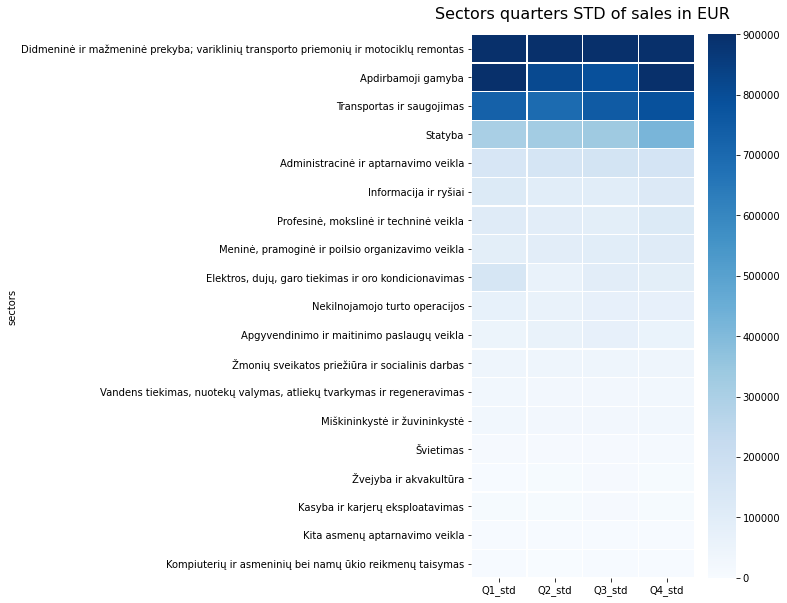

In [49]:
plt.subplots(figsize=(5, 10))
sns.heatmap(
    quarters_std.sort_values(by=['Q4_std'], ascending=False),
    vmin=0.0,
    vmax=900000.0,
    linewidths=.2,
    cmap='Blues'
)
plt.title('Sectors quarters STD of sales in EUR', fontdict={'fontsize': 16}, pad=15.5)

Standard deviation in EUR top 5 is the same as the sales. Except 5th place here is `Administracine ir aptarnavimo veikla` instead of `Elektros, duju, garo tiekimas ir oro kondicionavimas`.

### Join all quarters sales std percentage

In [50]:
quarter1_tmp = (sales_income.loc[sales_income.quarters.isin(quarter1_list)]
                            .groupby('sectors')
                            .money.agg([np.std, np.mean])
                            .round(2)
)
quarter1_tmp['q1_std_pct'] = ((quarter1_tmp['std'] / quarter1_tmp['mean']) * 100).round(2)

quarter2_tmp = (sales_income.loc[sales_income.quarters.isin(quarter2_list)]
                            .groupby('sectors')
                            .money.agg([np.std, np.mean])
                            .round(2)
)
quarter2_tmp['q2_std_pct'] = ((quarter2_tmp['std'] / quarter2_tmp['mean']) * 100).round(2)

quarter3_tmp = (sales_income.loc[sales_income.quarters.isin(quarter3_list)]
                            .groupby('sectors')
                            .money.agg([np.std, np.mean])
                            .round(2)
)
quarter3_tmp['q3_std_pct'] = ((quarter3_tmp['std'] / quarter3_tmp['mean']) * 100).round(2)

quarter4_tmp = (sales_income.loc[sales_income.quarters.isin(quarter4_list)]
                            .groupby('sectors')
                            .money.agg([np.std, np.mean])
                            .round(2)
)
quarter4_tmp['q4_std_pct'] = ((quarter4_tmp['std'] / quarter4_tmp['mean']) * 100).round(2)
# quarter1_tmp

In [51]:
del(quarter1_tmp['std'], quarter1_tmp['mean'],
    quarter2_tmp['std'], quarter2_tmp['mean'],
    quarter3_tmp['std'], quarter3_tmp['mean'],
    quarter4_tmp['std'], quarter4_tmp['mean'])

In [52]:
sales_qs_std_pct = (quarter1_tmp.join(quarter2_tmp, on='sectors')
                                .join(quarter3_tmp, on='sectors')
                                .join(quarter4_tmp, on='sectors')
)
# sales_qs_std_pct

In [53]:
sales_qs_std_pct.describe()

,q1_std_pct,q2_std_pct,q3_std_pct,q4_std_pct
count,19.000000,19.000000,19.000000,19.000000
mean,35.901579,33.776842,34.884211,35.422105
std,13.797871,16.222821,15.744697,15.917273
min,17.750000,12.770000,17.220000,12.450000
25%,26.440000,23.630000,23.075000,24.665000
50%,35.320000,29.060000,29.390000,31.120000
75%,42.040000,40.920000,44.815000,45.760000
max,73.490000,77.110000,78.140000,74.950000


Text(0.5, 1.0, 'Sectors quarters STD change in % of sales in EUR')

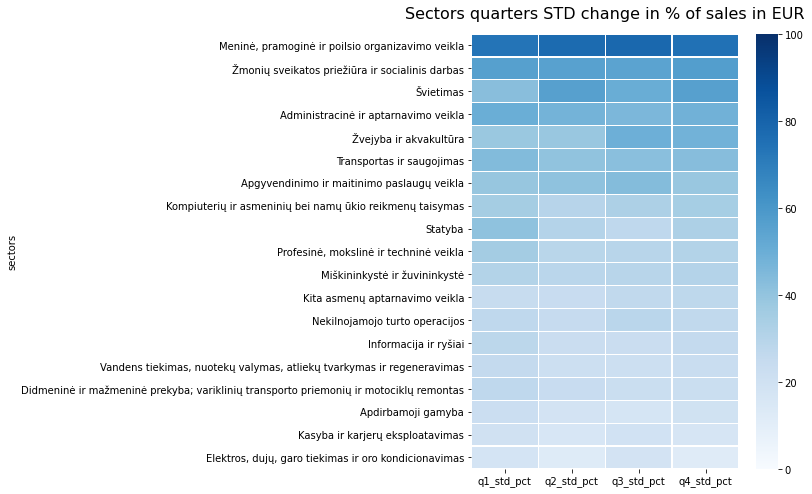

In [54]:
plt.subplots(figsize=(6, 8))
sns.heatmap(
    sales_qs_std_pct.sort_values(by=['q4_std_pct'], ascending=False),
    vmin=0.0,
    vmax=100.0,
    linewidths=.2,
    cmap='Blues'
)
plt.title('Sectors quarters STD change in % of sales in EUR', fontdict={'fontsize': 16}, pad=15.5)

But when compare sectors standard deviation converted to percent we have other sectors in bottom. 2 out of top 5 sales income sectors are in bottom 5 here. And Previously noticed most stable growth and fluctuations `healthcare` sector is in top 2 here.

#Profit analysis

In [55]:
profit = df[df['financial_elements'] == 'Pelnas,  nuostolis (-) prieš apmokestinimą']
del profit['financial_elements']

##Profit exploration

In [56]:
profit.head(3)

,quarters,sectors,money
5300,2007K1,Miškininkystė ir žuvininkystė,15644.0
5301,2007K2,Miškininkystė ir žuvininkystė,8802.0
5302,2007K3,Miškininkystė ir žuvininkystė,12263.0


In [57]:
profit['money'].describe()

count      1007.000000
mean      46444.678252
std       93819.442952
min     -432774.000000
25%         916.000000
50%        8768.000000
75%       57252.000000
max      769797.000000
Name: money, dtype: float64

#### Exploring sectors profit using swarmplot

Text(0.5, 1.0, 'Swarmplot of sectors profit money')

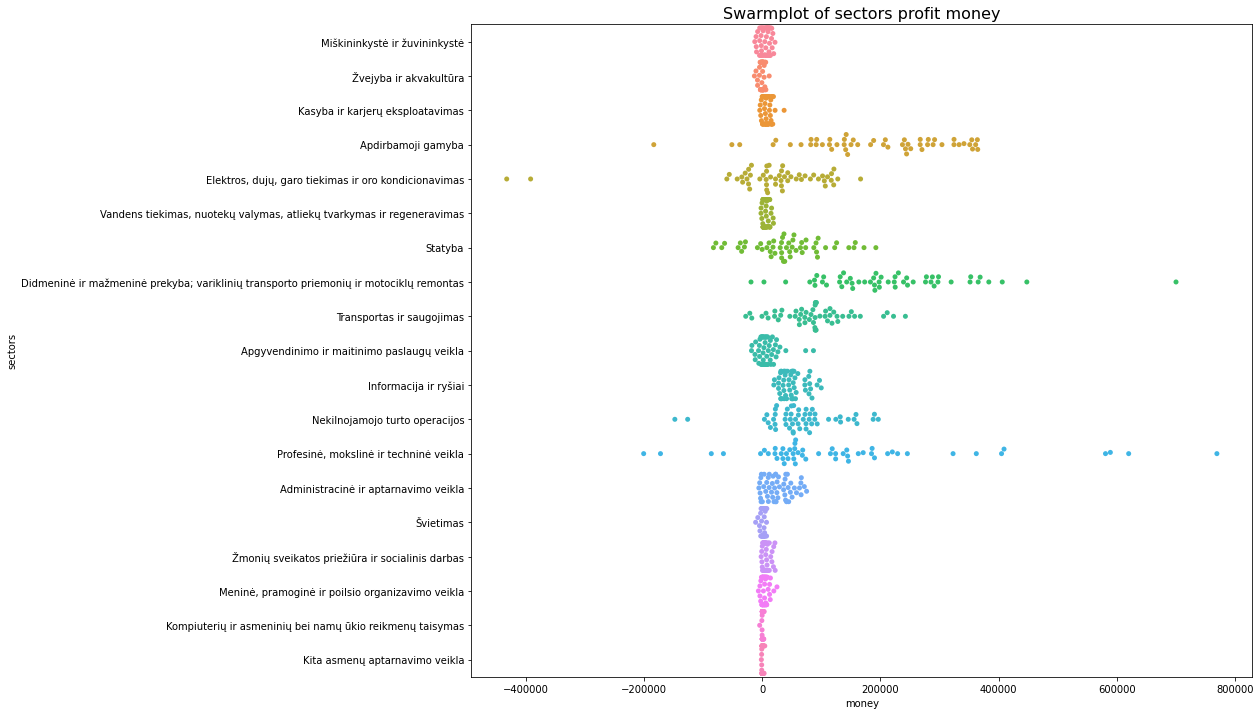

In [59]:
plt.subplots(figsize=(14, 12))
sns.swarmplot(x=profit['money'], y=profit['sectors'])
plt.title('Swarmplot of sectors profit money', fontdict={'fontsize': 16})

Slightly different picture in `profit` as in `sales`. But 2 biggest `sales` sectors are same in `profit`. Seems like one sector have extra ordinary fluctuations.

###Each sector quarterly percentage change

In [76]:
profit['change_percent'] = (profit.money.pct_change() * 100).round(2)
profit.describe()

,money,change_percent
count,1007.000000,1006.000000
mean,46444.678252,402.198917
std,93819.442952,15887.791372
min,-432774.000000,-25649.410000
25%,916.000000,-91.035000
50%,8768.000000,-21.485000
75%,57252.000000,42.337500
max,769797.000000,502000.000000


In [75]:
fig = px.line(profit, x="quarters", y="change_percent", color='sectors',
              title='Each sector quarters profit change in % from previous quarter') # profit[profit['sectors'].isin(sectors_top5[:3])]
fig.update_layout(
    margin=dict(l=5, r=5, b=5, t=50, pad=5),
    showlegend=False,
    yaxis_type="log"
)
fig.show()

In [61]:
profit.change_percent = np.where(profit.quarters == '2007K1', 0, profit.change_percent)
# profit.loc[profit['quarters'] == '2007K1']

### Each sector quarterly nominal (eur) change

In [62]:
fig = px.line(profit, x="quarters", y="money", color='sectors',
              title='Each sector quarters profit change in EUR from previous quarter') # profit[profit['sectors'].isin(sectors_top5[:3])]
fig.update_layout(
    margin=dict(l=5, r=5, b=5, t=50, pad=5),
    showlegend=False,
)
fig.show()

matosi, kad `elektra, dujos, garas, oro kondicionavimas` turejo krize 2009 ir 2014 metais (kuriais buvo ivestas euras). Bei svietimo sektorius vis aukstesnes virsunes pasiekia.

### Sectors by profit mean value

In [77]:
sectors_profit_mean = (
    profit.groupby('sectors')
          .money.agg([np.mean])
          .round(2)
          .sort_values(by=['mean'],  ascending=False)
)
# sectors_profit_mean

Text(0.5, 1.0, 'Each sector mean of all quarters, sorted by profit')

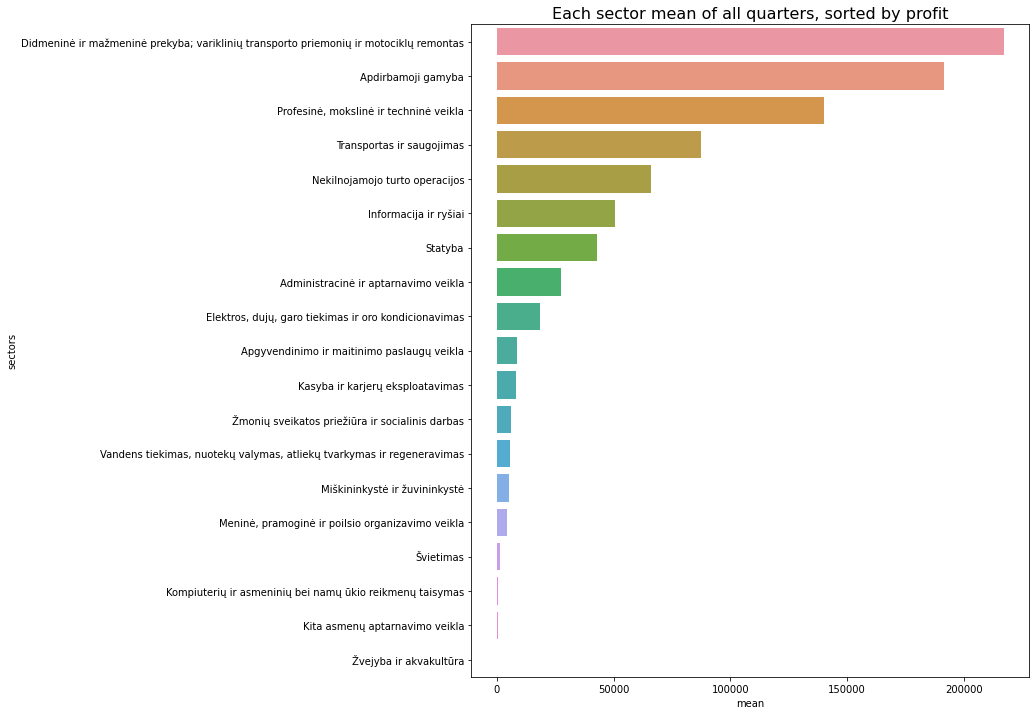

In [78]:
plt.subplots(figsize=(10, 12))
sns.barplot(x="mean", y=sectors_profit_mean.index, data=sectors_profit_mean)
plt.title('Each sector mean of all quarters, sorted by profit', fontdict={'fontsize': 16})

## Same quarter each year
from `2007 q1` up to `2020 q1`

In [79]:
profit_q1_std = (profit.loc[profit.quarters.isin(quarter1_list)]
                        .groupby('sectors')
                        .money.agg([np.std])
                        .round(2)
                        .rename(columns={'std': 'Q1_std'})
                      )
profit_q2_std = (profit.loc[profit.quarters.isin(quarter2_list)]
                        .groupby('sectors')
                        .money.agg([np.std])
                        .round(2)
                        .rename(columns={'std': 'Q2_std'})
                      )
profit_q3_std = (profit.loc[profit.quarters.isin(quarter3_list)]
                        .groupby('sectors')
                        .money.agg([np.std])
                        .round(2)
                        .rename(columns={'std': 'Q3_std'})
                      )
profit_q4_std = (profit.loc[profit.quarters.isin(quarter4_list)]
                        .groupby('sectors')
                        .money.agg([np.std])
                        .round(2)
                        .rename(columns={'std': 'Q4_std'})
                      )

In [80]:
profit_qs_std = (
    profit_q1_std.join(profit_q2_std,on='sectors')
                 .join(profit_q3_std,on='sectors')
                 .join(profit_q4_std,on='sectors')
)
profit_qs_std

,Q1_std,Q2_std,Q3_std,Q4_std
sectors,,,,
Administracinė ir aptarnavimo veikla,13477.50,22556.21,21847.67,25669.66
Apdirbamoji gamyba,111154.82,110335.98,93734.77,146097.19
Apgyvendinimo ir maitinimo paslaugų veikla,7921.03,9023.88,25785.79,8967.32
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,72910.24,87964.44,102373.82,175886.13
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",23065.51,25364.96,27964.49,167826.64
Informacija ir ryšiai,13996.06,18393.21,21744.96,25359.15
Kasyba ir karjerų eksploatavimas,4410.73,9487.09,4562.71,4039.48
Kita asmenų aptarnavimo veikla,1088.52,888.67,1400.02,655.23
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,700.65,706.23,1643.88,794.97


### quarterly profit std vs sectors heatmap

In [81]:
profit_qs_std.describe().round(2)

,Q1_std,Q2_std,Q3_std,Q4_std
count,19.00,19.00,19.00,19.00
mean,22822.63,37541.93,30761.99,50726.92
std,28993.53,61143.14,33810.64,63757.35
min,700.65,706.23,1400.02,655.23
25%,4143.29,4429.02,4538.92,4657.73
50%,7921.03,9487.09,21744.96,8967.32
75%,34671.08,47723.59,49464.16,84866.69
max,111154.82,254810.25,102373.82,175886.13


In [82]:
profit_qs_std.describe().round(2)

,Q1_std,Q2_std,Q3_std,Q4_std
count,19.00,19.00,19.00,19.00
mean,22822.63,37541.93,30761.99,50726.92
std,28993.53,61143.14,33810.64,63757.35
min,700.65,706.23,1400.02,655.23
25%,4143.29,4429.02,4538.92,4657.73
50%,7921.03,9487.09,21744.96,8967.32
75%,34671.08,47723.59,49464.16,84866.69
max,111154.82,254810.25,102373.82,175886.13


### Join all quarters sales std percentage

In [83]:
profit_q1_tmp = (profit.loc[profit.quarters.isin(quarter1_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
profit_q1_tmp['q1_std_pct'] = ((profit_q1_tmp['std'] / profit_q1_tmp['mean']) * 100).round(2)

profit_q2_tmp = (profit.loc[profit.quarters.isin(quarter2_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
profit_q2_tmp['q2_std_pct'] = ((profit_q2_tmp['std'] / profit_q2_tmp['mean']) * 100).round(2)

profit_q3_tmp =  (profit.loc[profit.quarters.isin(quarter3_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
profit_q3_tmp['q3_std_pct'] =((profit_q3_tmp['std'] / profit_q3_tmp['mean']) * 100).round(2)

profit_q4_tmp = (profit.loc[profit.quarters.isin(quarter4_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
profit_q4_tmp['q4_std_pct'] =((profit_q4_tmp['std'] / profit_q4_tmp['mean']) * 100).round(2)
profit_q4_tmp
# .sort_values(by=['std_pct'],  ascending=True)

,std,mean,q4_std_pct
sectors,,,
Administracinė ir aptarnavimo veikla,25669.66,21149.69,121.37
Apdirbamoji gamyba,146097.19,129845.62,112.52
Apgyvendinimo ir maitinimo paslaugų veikla,8967.32,401.08,2235.79
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,175886.13,214926.77,81.84
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",167826.64,-42449.69,-395.35
Informacija ir ryšiai,25359.15,49728.08,51.00
Kasyba ir karjerų eksploatavimas,4039.48,5428.77,74.41
Kita asmenų aptarnavimo veikla,655.23,-135.15,-484.82
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,794.97,310.31,256.19


In [84]:
del(profit_q1_tmp['std'], profit_q1_tmp['mean'],
    profit_q2_tmp['std'], profit_q2_tmp['mean'],
    profit_q3_tmp['std'], profit_q3_tmp['mean'],
    profit_q4_tmp['std'], profit_q4_tmp['mean'])

In [85]:
profit_qs_std_pct = (
    profit_q1_tmp.join(profit_q2_tmp, on='sectors')
                 .join(profit_q3_tmp, on='sectors')
                 .join(profit_q4_tmp, on='sectors')
)
# profit_qs_std_pct

In [86]:
profit_qs_std_pct.describe().round(2)

,q1_std_pct,q2_std_pct,q3_std_pct,q4_std_pct
count,19.00,19.00,19.00,19.00
mean,31.36,911.97,234.01,2216.24
std,127.21,3054.97,666.36,7311.91
min,-275.14,32.03,-218.62,-484.82
25%,41.22,63.64,44.50,78.12
50%,63.94,79.99,69.32,114.66
75%,96.50,167.76,115.23,198.40
max,181.41,13362.26,2943.75,31422.69


Text(0.5, 1.0, 'Sectors quarters STD % of profit')

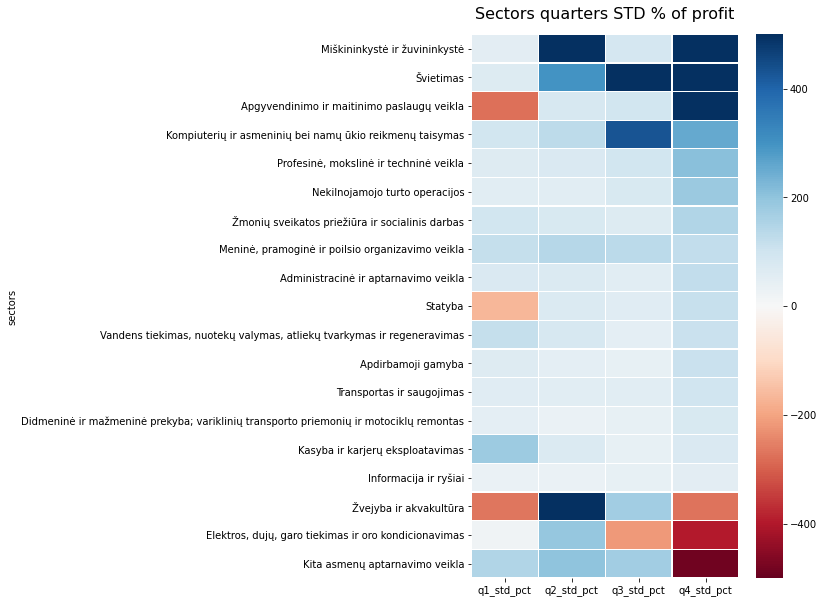

In [89]:
plt.subplots(figsize=(6, 10))
sns.heatmap(
    profit_qs_std_pct.sort_values(by=['q4_std_pct'],  ascending=False),
    vmin= -500.0,
    vmax= 500.0,
    cmap='RdBu',
    center=0,
    linewidths=.2
)
plt.title('Sectors quarters STD % of profit', fontdict={'fontsize': 16}, pad=15.5)

In [90]:
profit_qs_std_pct

,q1_std_pct,q2_std_pct,q3_std_pct,q4_std_pct
sectors,,,,
Administracinė ir aptarnavimo veikla,76.04,71.25,55.38,121.37
Apdirbamoji gamyba,64.34,47.64,40.01,112.52
Apgyvendinimo ir maitinimo paslaugų veikla,-275.14,83.64,96.75,2235.79
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,50.52,34.69,39.11,81.84
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",21.09,191.81,-218.62,-395.35
Informacija ir ryšiai,31.91,32.03,41.67,51.00
Kasyba ir karjerų eksploatavimas,181.41,71.64,40.19,74.41
Kita asmenų aptarnavimo veikla,150.14,202.11,173.80,-484.82
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,95.41,132.23,430.85,256.19


# Profit margin (profit / income)

In [91]:
profit_index = profit.copy(deep=True)

In [92]:
profit_index = profit.set_index(['quarters', 'sectors'])
sales_income = sales_income.set_index(['quarters', 'sectors'])

In [93]:
profit_index.head(3)

,,money,change_percent
quarters,sectors,,
2007K1,Miškininkystė ir žuvininkystė,15644.0,NaN
2007K2,Miškininkystė ir žuvininkystė,8802.0,-43.74
2007K3,Miškininkystė ir žuvininkystė,12263.0,39.32


In [94]:
profit_index = profit_index.join(sales_income['money'], on=['quarters', 'sectors'], how='left', lsuffix='_profit', rsuffix='_sales')
profit_index.head(3)

,,money_profit,change_percent,money_sales
quarters,sectors,,,
2007K1,Miškininkystė ir žuvininkystė,15644.0,NaN,68087.0
2007K2,Miškininkystė ir žuvininkystė,8802.0,-43.74,71223.0
2007K3,Miškininkystė ir žuvininkystė,12263.0,39.32,67552.0


In [95]:
profit_index['profit_index'] = ((profit_index['money_profit'] / profit_index['money_sales']) * 100).round(2)
profit_index = profit_index.reset_index()
profit_index.head(3)

,quarters,sectors,money_profit,change_percent,money_sales,profit_index
0,2007K1,Miškininkystė ir žuvininkystė,15644.0,NaN,68087.0,22.98
1,2007K2,Miškininkystė ir žuvininkystė,8802.0,-43.74,71223.0,12.36
2,2007K3,Miškininkystė ir žuvininkystė,12263.0,39.32,67552.0,18.15


In [96]:
profit_index = profit_index.drop(columns= 'money_sales')
profit_index.head(3)

,quarters,sectors,money_profit,change_percent,profit_index
0,2007K1,Miškininkystė ir žuvininkystė,15644.0,NaN,22.98
1,2007K2,Miškininkystė ir žuvininkystė,8802.0,-43.74,12.36
2,2007K3,Miškininkystė ir žuvininkystė,12263.0,39.32,18.15


## Each sector quarter / quarter change

Text(0.5, 1.0, 'Each sector quarter by quarter change of profitability in %')

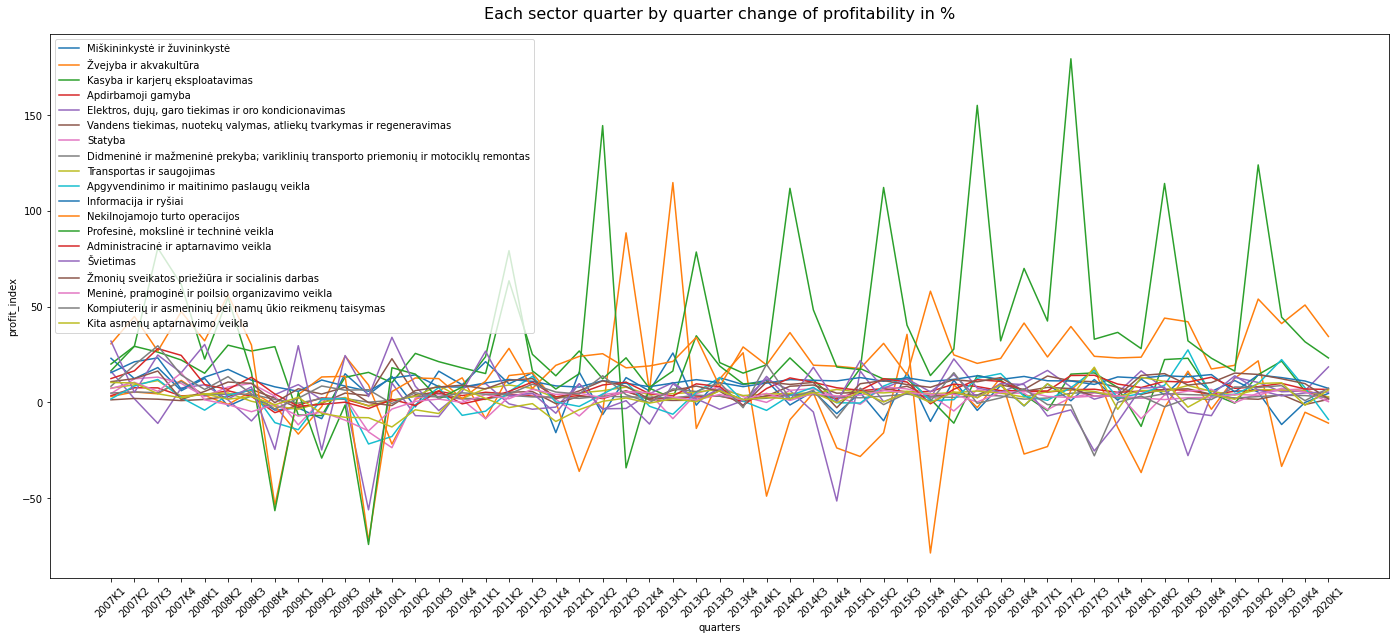

In [97]:
plt.subplots(figsize=(24, 10))
plt.xticks(rotation=45)
for sector in sectors:
  sns.lineplot(x=profit_index['quarters'].loc[profit_index['sectors'] == sector],
               y=profit_index['profit_index'].loc[profit_index['sectors'] == sector], label=sector)
plt.title('Each sector quarter by quarter change of profitability in %', fontdict={'fontsize': 16}, pad=15.5)

Exploring profitability reveal that few sectors have big `spykes`. Some sectors experience `spykes` to positive side while others to negative.

##Same quarter each year

In [98]:
profit_i_q1 = (profit_index.loc[profit_index.quarters.isin(quarter1_list)]
                              .groupby('sectors')
                              .profit_index.agg([np.mean])
                              .round(2)
                              .rename(columns={'mean': 'Q1_mean'})
                            )
profit_i_q2 = (profit_index.loc[profit_index.quarters.isin(quarter2_list)]
                              .groupby('sectors')
                              .profit_index.agg([np.mean])
                              .round(2)
                              .rename(columns={'mean': 'Q2_mean'})
                            )
profit_i_q3 = (profit_index.loc[profit_index.quarters.isin(quarter3_list)]
                              .groupby('sectors')
                              .profit_index.agg([np.mean])
                              .round(2)
                              .rename(columns={'mean': 'Q3_mean'})
                            )
profit_i_q4 = (profit_index.loc[profit_index.quarters.isin(quarter4_list)]
                              .groupby('sectors')
                              .profit_index.agg([np.mean])
                              .round(2)
                              .rename(columns={'mean': 'Q4_mean'})
                            )

In [99]:
profit_i_qs_mean = (profit_i_q1.join(profit_i_q2,on='sectors')
                        .join(profit_i_q3,on='sectors')
                        .join(profit_i_q4,on='sectors')
)
profit_i_qs_mean

,Q1_mean,Q2_mean,Q3_mean,Q4_mean
sectors,,,,
Administracinė ir aptarnavimo veikla,5.64,8.83,10.98,5.60
Apdirbamoji gamyba,4.02,5.18,5.03,2.51
Apgyvendinimo ir maitinimo paslaugų veikla,-3.56,6.05,12.88,-1.61
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,2.26,3.73,3.65,2.93
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",13.60,2.66,-2.27,-5.35
Informacija ir ryšiai,10.48,13.49,11.87,9.84
Kasyba ir karjerų eksploatavimas,5.77,22.23,19.21,10.78
Kita asmenų aptarnavimo veikla,3.48,2.16,3.59,-0.91
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,6.60,5.72,4.84,2.03


In [100]:
profit_i_qs_mean.describe()

,Q1_mean,Q2_mean,Q3_mean,Q4_mean
count,19.000000,19.000000,19.000000,19.000000
mean,6.718947,11.638421,9.450526,3.240526
std,7.791639,20.688852,7.085969,5.669296
min,-6.280000,-0.330000,-2.270000,-6.750000
25%,2.870000,2.410000,4.580000,-0.115000
50%,5.640000,5.180000,6.460000,2.740000
75%,11.475000,9.515000,12.375000,4.570000
max,21.090000,89.860000,25.340000,15.370000


# Conclusion

### Heat map of profitability index

Text(0.5, 1.0, 'Sectors quarters mean of profitability percentage')

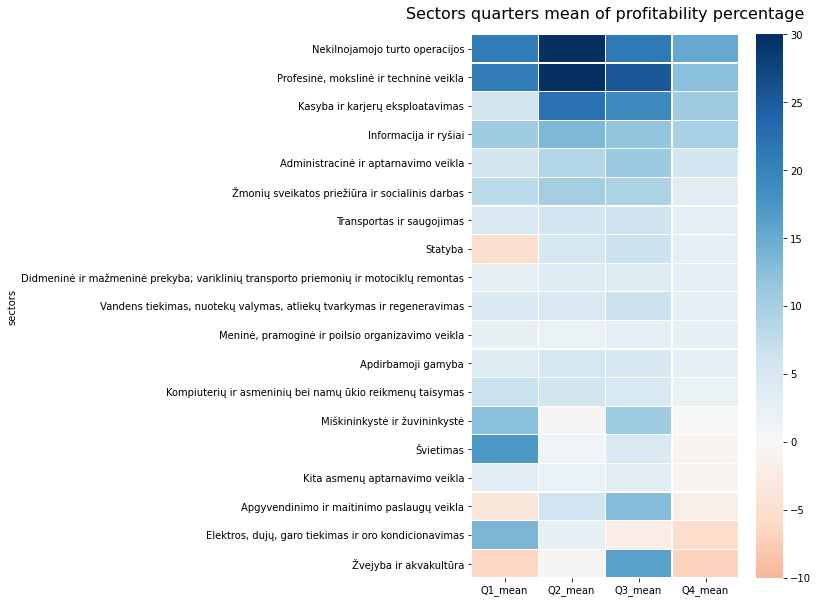

In [101]:
plt.subplots(figsize=(6, 10))
sns.heatmap(
    profit_i_qs_mean.sort_values(by=['Q4_mean'], ascending=False),
    linewidths=.2,
    center=0,
    vmin=-10,
    vmax=30,
    cmap='RdBu'
)
plt.title('Sectors quarters mean of profitability percentage', fontdict={'fontsize': 16}, pad=15.5)